# Covid-19 Senior Seminar

The following equations govern the model for covid spreading on an urban college campus, which is very similar to Tulane's college campus.

\begin{equation}
    \frac{dS}{dt}=-\beta SA-\beta SI -ES
\end{equation}
\begin{equation}
    \frac{dA}{dt}=\beta SA+ \beta SI -f_{S}A-f_{R}A-sf_{T}A+ES
\end{equation}
\begin{equation}
    \frac{dI}{dt}=f_{S}A-f_{R}I-f_{Q}I
\end{equation}
\begin{equation}
    \frac{dQ}{dt}=f_{Q}I+sf_{T}A-f_{R}Q
\end{equation}
\begin{equation}
    \frac{dR}{dt}=f_{R}Q+f_{R}I+f_{R}A=f_{R}(Q+I+A)
\end{equation}

We will be performing Eulers forward method with a step size of h=0.5 to this system of equations.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
#first we have to initialize some of the current parameters:
N = 10000 #population size 10,000
s1 = 0.9 #testing efficency
TR = 14 #infection lasts this long
Ss = 0.60 #asymptomatic to symptomatic
h = 0.01 #step size
fT = 2/7 #testing frequency
Ro = 2.50 #R not number
fR = 1/14
B = (Ro*fR)/N #beta in function
fQ = 0.01
E = 0.007

In [39]:
# Define parameters
h = 0.1 # Step size
t = np.arange(0, 100, h) # Numerical grid
s0 = N # Initial Condition
a0 = 0
i0 = 0
q0 = 0
r0 = 0

In [40]:
# Explicit Euler Method
s = np.zeros(len(t))
s[0] = int(s0)

a = np.zeros(len(t))
a[0] = a0

I = np.zeros(len(t))
I[0] = i0

q = np.zeros(len(t))
q[0] = q0

r = np.zeros(len(t))
r[0] = r0

In [41]:
#Functions
f = lambda i, S, a: (-(B*S*a)-(B*S*i)-(E*S)) # ODE
f1 = lambda I, S, a: (B*S*a + B*S*I + E*S - Ss*fR*a-fR*a-s1*fT*a) # ODE
f2 = lambda I, a: (Ss*fR*a-fR*I-fQ*I) # ODE
f3 = lambda I, a, q: (fQ*I+s1*fT*a-fR*q) # ODE
f4 = lambda I, a, q: (fR*q+fR*I+fR*a) # ODE



In [42]:
#Eulers method
for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h* f(I[i], s[i], a[i])
    a[i + 1] = a[i] + h* f1(I[i], s[i], a[i])
    I[i + 1] = I[i] + h* f2(I[i], a[i])
    q[i + 1] = q[i] + h* f3(I[i], a[i], q[i])
    r[i + 1] = r[i] + h* f4(I[i], a[i], q[i])

Text(0.5, 1.0, 'Approximate Sulution for R(t)')

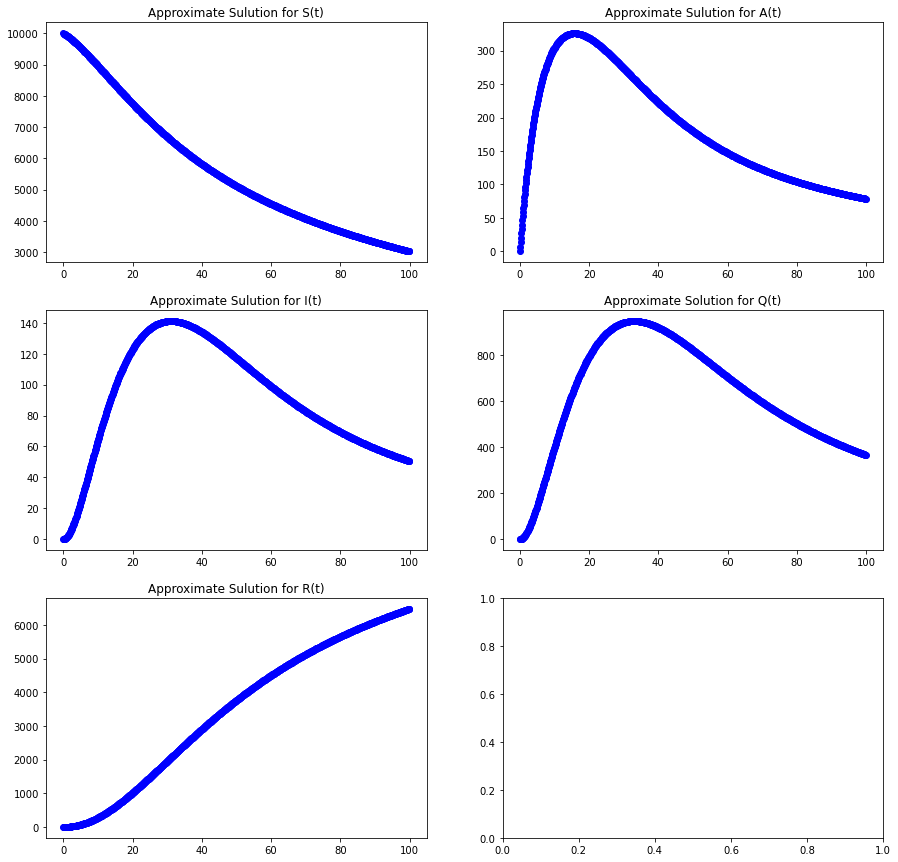

In [43]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

axes[0, 0].plot(t, s, 'bo--', label='Approximate')
axes[0, 0].set_title('Approximate Sulution for S(t)')


axes[0, 1].plot(t, a, 'bo--', label='Approximate')
axes[0, 1].set_title('Approximate Sulution for A(t)')


axes[1, 0].plot(t, I, 'bo--', label='Approximate')
axes[1,0].set_title('Approximate Sulution for I(t)')


axes[1,1].plot(t, q, 'bo--', label='Approximate')
axes[1,1].set_title('Approximate Solution for Q(t)')

axes[2,0].plot(t, r, 'bo--', label='Approximate')
axes[2,0].set_title('Approximate Sulution for R(t)')

## Eulers Method with Various Values of $R_0$

In [94]:
#Next I will make a funciton so that it will take in various values of the different
#parameters and then I can feed it into different things:
def Euler_params(Ro):
#first we have to initialize some of the current parameters:
#first we have to initialize some of the current parameters:
    fT = 2/7 #testing frequency
    fQ = 10
    E = 0.0007
    N = 10000 #population size 10,000
    s1 = 0.9 #testing efficency
    TR = 14 #infection lasts this long
    Ss = 0.60 #asymptomatic to symptomatic
    h = 0.01 #step size
    fR = 1/14
    B = (Ro*fR)/N #beta in function
    t = np.arange(0, 100, h) # Numerical grid
    s0 = N # Initial Condition
    a0 = 0
    i0 = 0
    q0 = 0
    r0 = 0
    
    t = np.arange(0, 100, h)# Numerical grid
    
    # Explicit Euler Method
    s = np.zeros(len(t))
    s[0] = int(s0)

    a = np.zeros(len(t))
    a[0] = a0

    I = np.zeros(len(t))
    I[0] = i0

    q = np.zeros(len(t))
    q[0] = q0

    r = np.zeros(len(t))
    r[0] = r0
    #Functions
    f = lambda i, S, a: (-(B*S*a)-(B*S*i)-(E*S)) # ODE
    f1 = lambda I, S, a: (B*S*a + B*S*I + E*S - Ss*fR*a-fR*a-s1*fT*a) # ODE
    f2 = lambda I, a: (Ss*fR*a-fR*I-fQ*I) # ODE
    f3 = lambda I, a, q: (fQ*I+s1*fT*a-fR*q) # ODE
    f4 = lambda I, a, q: (fR*q+fR*I+fR*a) # ODE
    
    #Eulers method
    for i in range(0, len(t) - 1):
        s[i + 1] = s[i] + h* f(I[i], s[i], a[i])
        a[i + 1] = a[i] + h* f1(I[i], s[i], a[i])
        I[i + 1] = I[i] + h* f2(I[i], a[i])
        q[i + 1] = q[i] + h* f3(I[i], a[i], q[i])
        r[i + 1] = r[i] + h* f4(I[i], a[i], q[i])
    
    sum_of_all = np.zeros(len(t))
    positive = np.zeros (len(t))
    as_symp = np.zeros(len(t))
    for i in range(0, len(t)):
        positive[i] = N - s[i]
        sum_of_all[i] = s[i] + a[i] + I[i] + q[i] + r[i]
        as_symp[i] = a[i]+I[i]
    
    fig, axes = plt.subplots(nrows=3, ncols=2, sharey = True, figsize=(15, 15))

    axes[0, 0].plot(t, s)
    axes[0, 0].set_title('Approximate Sulution for S(t)')
    axes[0, 0].grid()

    axes[0, 1].plot(t, a)
    axes[0, 1].set_title('Approximate Sulution for A(t)')
    axes[0, 1].grid()


    axes[1, 0].plot(t, I)
    axes[1,0].set_title('Approximate Sulution for I(t)')
    axes[1, 0].grid()


    axes[1,1].plot(t, q)
    axes[1,1].set_title('Approximate Solution for Q(t)')
    axes[1,1].grid()

    axes[2,0].plot(t, r)
    axes[2,0].set_title('Approximate Sulution for R(t)')
    axes[2,0].grid()
    
    axes[2,1].plot(t, positive)
    axes[2,1].set_title("Approximate Solution for Positive Cases")
    axes[2,1].grid()
    
    Reff = (Ro/(Ss+1+s1*fT*TR))
    
    return t, positive
    
    

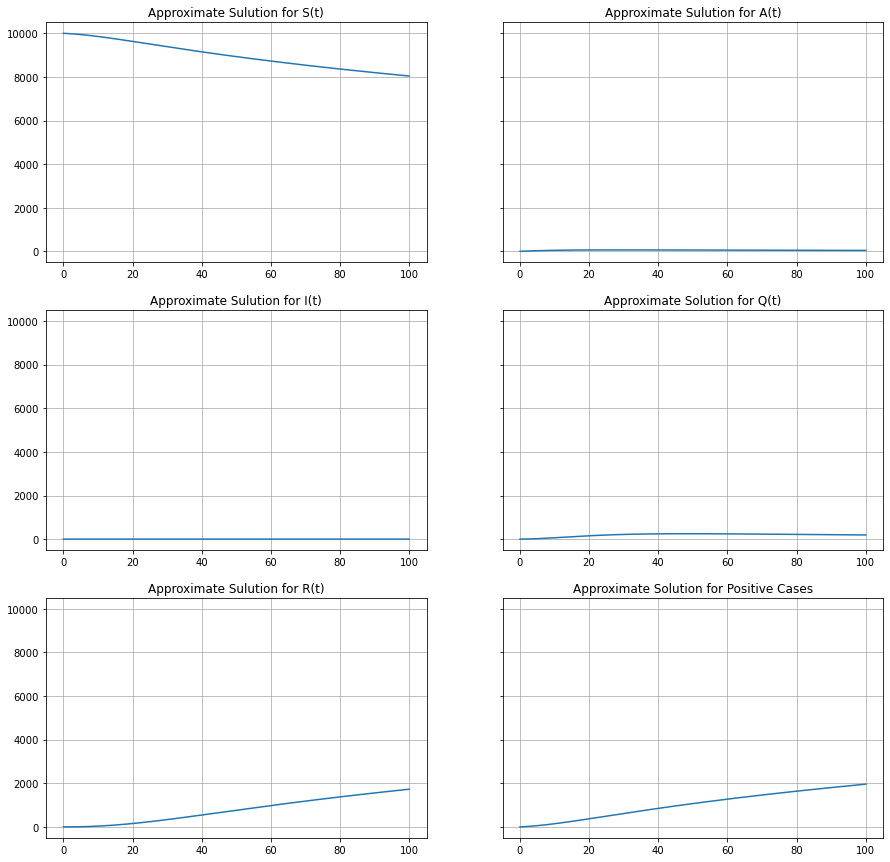

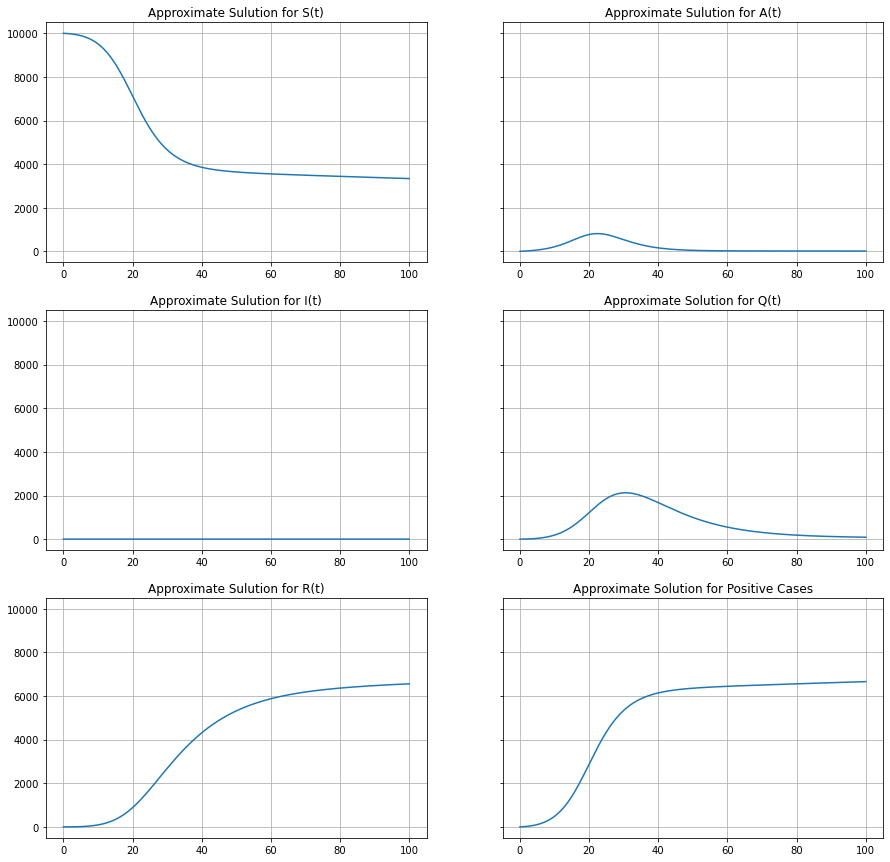

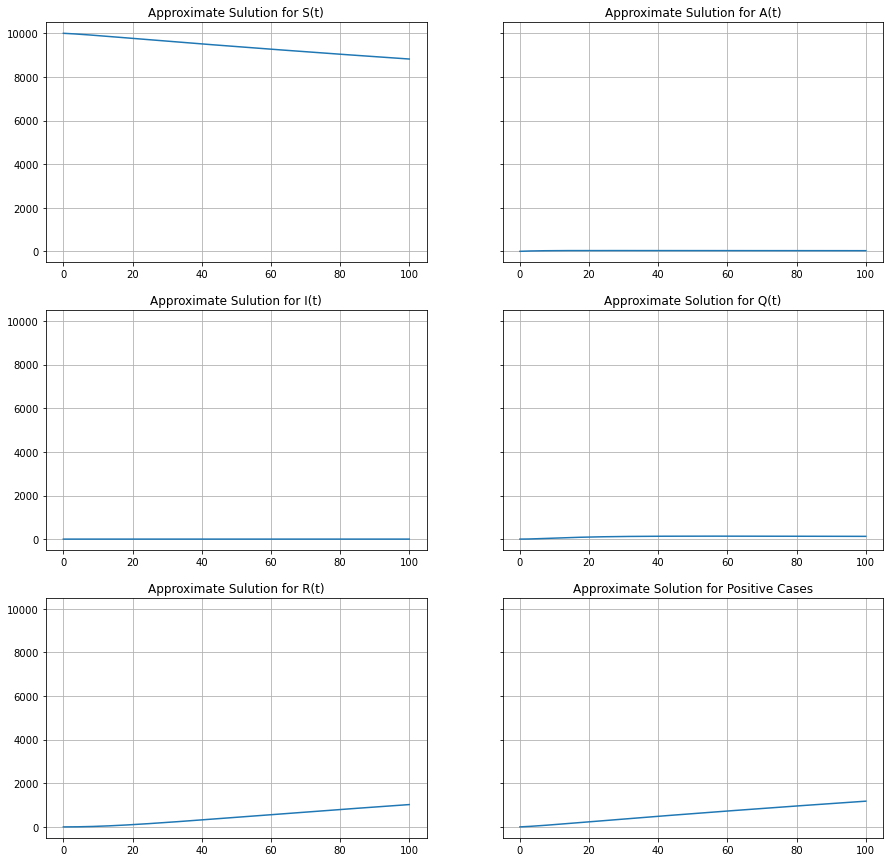

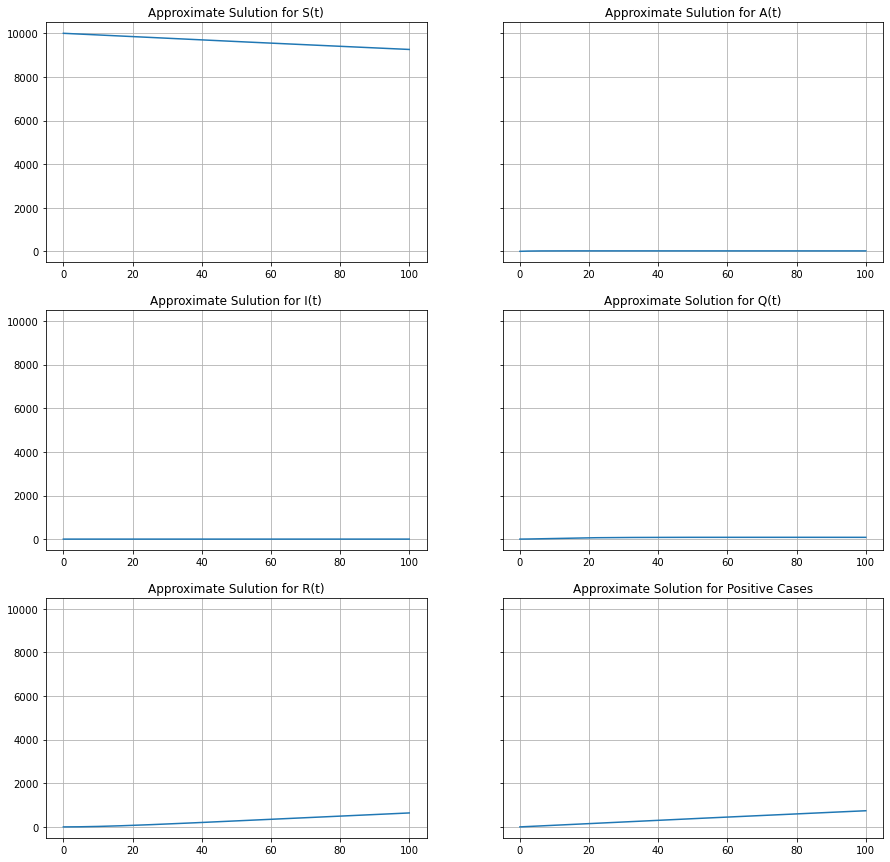

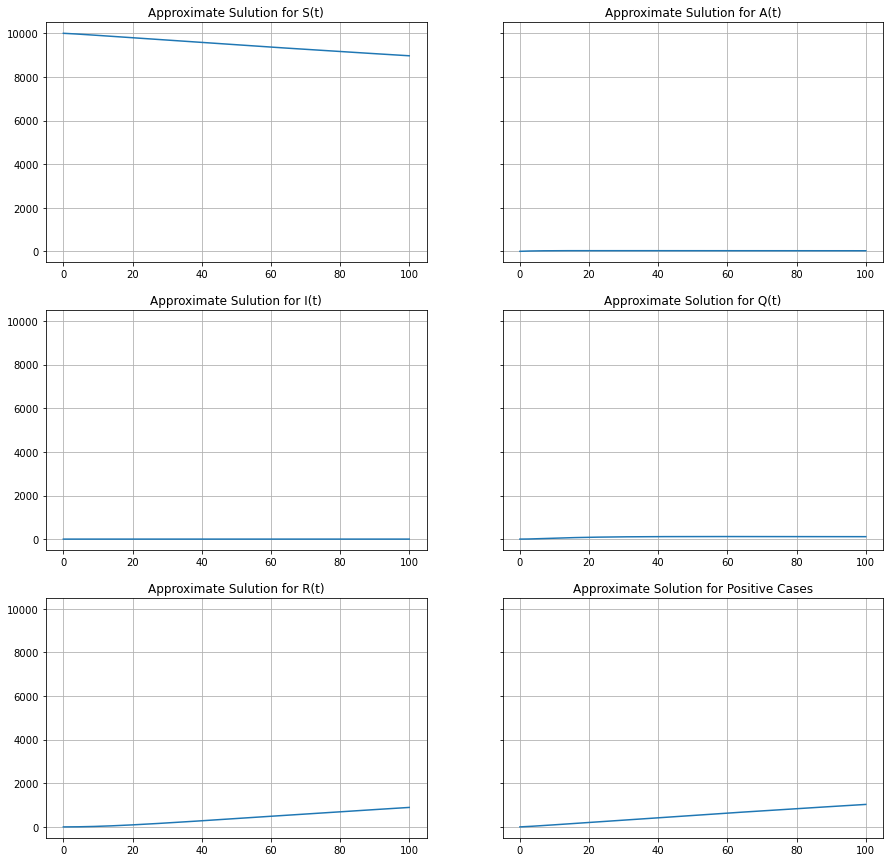

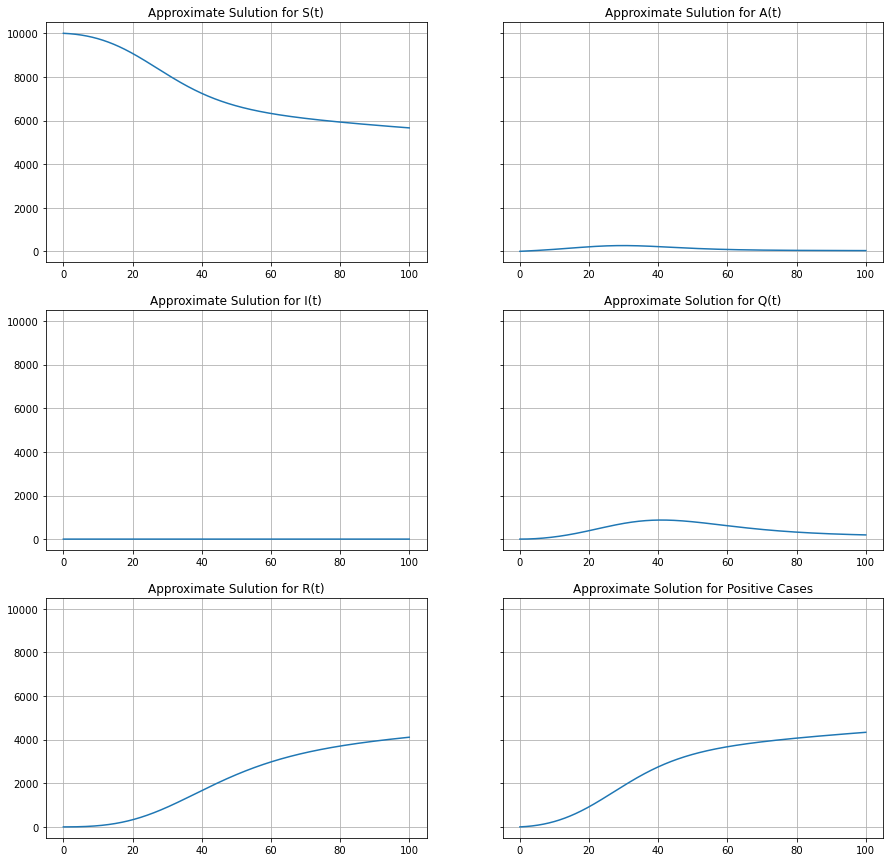

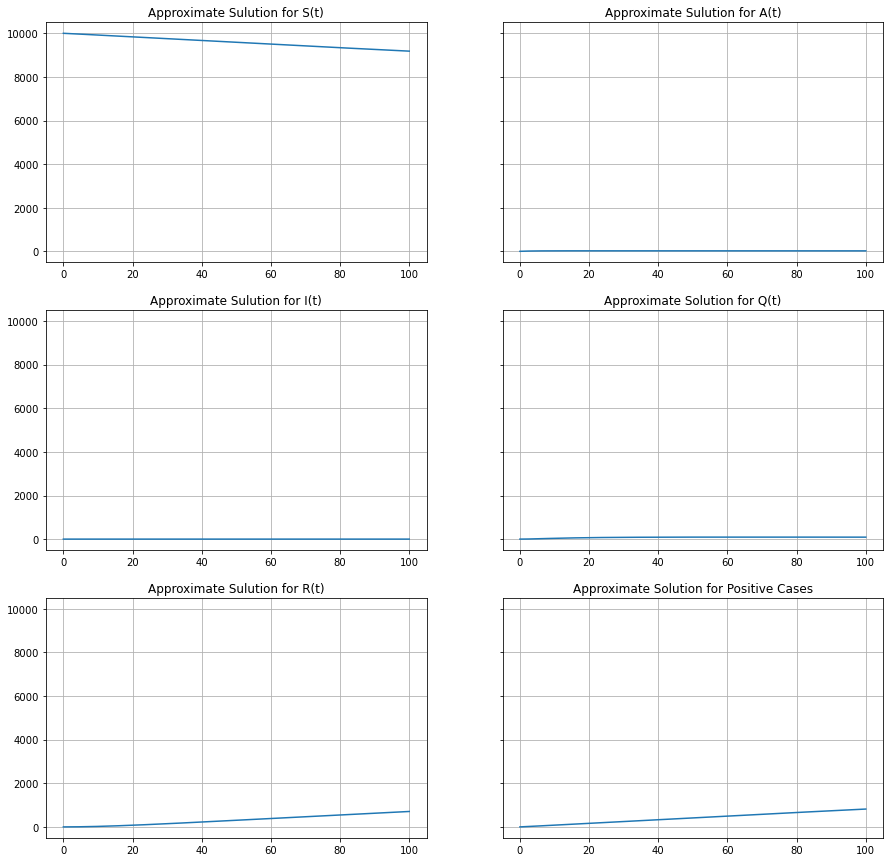

In [95]:
z = Euler_params(4.0)
x = Euler_params(8)
y = Euler_params(2.5)
w = Euler_params(0.5)
l =Euler_params(2)
g = Euler_params(6)
j = Euler_params(1)

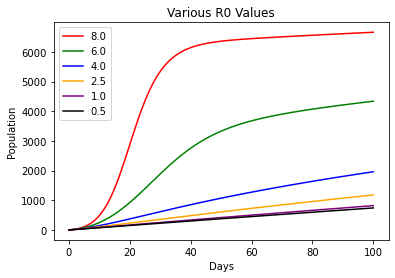

In [96]:
# Plotting both the curves simultaneously
plt.plot(x[0], x[1], color='r', label='8.0')
plt.plot(g[0], g[1], color='g', label='6.0')
plt.plot(z[0], z[1], color='b', label='4.0')
plt.plot(y[0], y[1], color='orange', label='2.5')
plt.plot(j[0], j[1], color='purple', label='1.0')
plt.plot(w[0], w[1], color='black', label='0.5')
#plt.plot(l[0], l[1], color='g', label='2.0')


  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Days")
plt.ylabel("Population")
plt.title("Various R0 Values")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

## Next
Create a funciton for various $R_0$ values and their total number of cases

In [113]:
#Next I will make a funciton so that it will take in various values of the different
#parameters and then I can feed it into different things:
def Euler_params_Reff(Ro):
#first we have to initialize some of the current parameters:
#first we have to initialize some of the current parameters:
    fT = 2/7 #testing frequency
    fQ = 10
    E = 0.0007
    N = 10000 #population size 10,000
    s1 = 0.9 #testing efficency
    TR = 14 #infection lasts this long
    Ss = 0.60 #asymptomatic to symptomatic
    h = 0.01 #step size
    fR = 1/14
    B = (Ro*fR)/N #beta in function
    t = np.arange(0, 100, h) # Numerical grid
    s0 = N # Initial Condition
    a0 = 0
    i0 = 0
    q0 = 0
    r0 = 0
    
    t = np.arange(0, 100, h)# Numerical grid
    
    # Explicit Euler Method
    s = np.zeros(len(t))
    s[0] = int(s0)

    a = np.zeros(len(t))
    a[0] = a0

    I = np.zeros(len(t))
    I[0] = i0

    q = np.zeros(len(t))
    q[0] = q0

    r = np.zeros(len(t))
    r[0] = r0
    #Functions
    f = lambda i, S, a: (-(B*S*a)-(B*S*i)-(E*S)) # ODE
    f1 = lambda I, S, a: (B*S*a + B*S*I + E*S - Ss*fR*a-fR*a-s1*fT*a) # ODE
    f2 = lambda I, a: (Ss*fR*a-fR*I-fQ*I) # ODE
    f3 = lambda I, a, q: (fQ*I+s1*fT*a-fR*q) # ODE
    f4 = lambda I, a, q: (fR*q+fR*I+fR*a) # ODE
    
    #Eulers method
    for i in range(0, len(t) - 1):
        s[i + 1] = s[i] + h* f(I[i], s[i], a[i])
        a[i + 1] = a[i] + h* f1(I[i], s[i], a[i])
        I[i + 1] = I[i] + h* f2(I[i], a[i])
        q[i + 1] = q[i] + h* f3(I[i], a[i], q[i])
        r[i + 1] = r[i] + h* f4(I[i], a[i], q[i])
    
    sum_of_all = np.zeros(len(t))
    positive = np.zeros (len(t))
    as_symp = np.zeros(len(t))
    for i in range(0, len(t)):
        positive[i] = N - s[i]
        sum_of_all[i] = s[i] + a[i] + I[i] + q[i] + r[i]
        as_symp[i] = a[i]+I[i]
    
    totalcase = positive[-1]
    
    Reff = (Ro/(Ss+1+s1*fT*TR))
    
    return totalcase, Reff

In [117]:
x = Euler_params_Reff(13)
x

(9036.540508959393, 2.5000000000000004)

In [161]:
rnot = np.arange(0, 8, 0.5)

In [162]:
total_case = np.zeros(len(rnot))
R_eff = np.zeros(len(rnot))
for i in range(0, len(rnot)):
    x = Euler_params_Reff(i)
    total_case[i] = x[0]


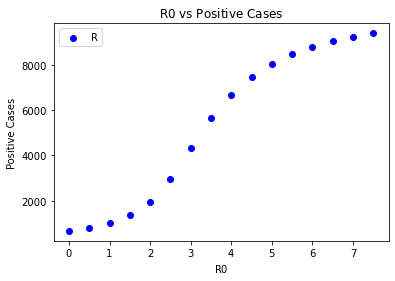

In [163]:
plt.scatter(rnot, total_case, color='b', label='R')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("R$0$")
plt.ylabel("Positive Cases")
plt.title("R$0$ vs Positive Cases")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()